# Stock Price Trend Prediction with LSTM
**Objective:** Predict future stock prices using historical data and LSTM model.
**Tools:** Python, Keras, Pandas, Matplotlib, Yahoo Finance API


In [5]:
# Step 1: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os

# Create folder for screenshots if it doesn't exist
if not os.path.exists("DemoScreenshots"):
    os.makedirs("DemoScreenshots")


## Step 2: Fetch Historical Data
We use Yahoo Finance API to fetch historical stock prices.


In [6]:
# Fetch historical stock data for a company (e.g., Apple)
ticker = "AAPL"
df = yf.download(ticker, start="2015-01-01", end="2025-01-01")
df.head()


C:\Users\Syed Asgher\AppData\Local\Temp\ipykernel_21436\1154489785.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.261044,24.729267,23.821668,24.718171,212818400
2015-01-05,23.577570,24.110146,23.391169,24.030260,257142000
2015-01-06,23.579796,23.839426,23.218087,23.641929,263188400
2015-01-07,23.910431,24.010288,23.677428,23.788382,160423600
2015-01-08,24.829130,24.886826,24.121248,24.238859,237458000


## Step 3: Visualize Closing Prices
Plotting historical closing prices to observe trends.


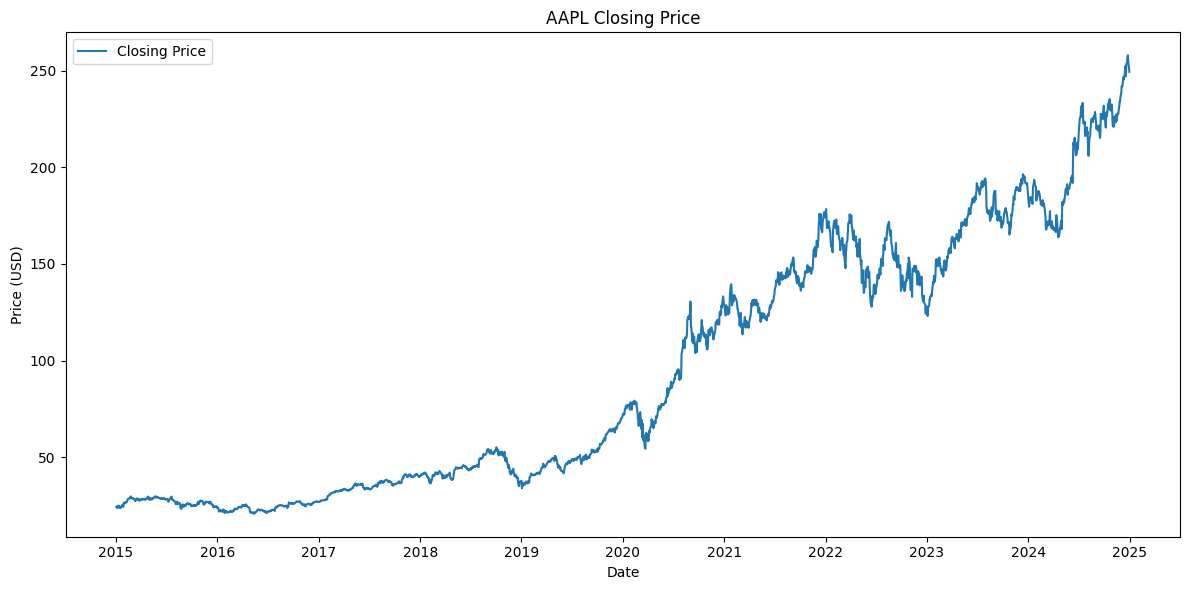

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.title(f'{ticker} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.savefig("DemoScreenshots/closing_price.png")
plt.show()


## Step 4: Normalize Data
We scale closing prices between 0 and 1 for LSTM model training.


In [8]:
# Only use 'Close' column
data = df['Close'].values
data = data.reshape(-1,1)

# Scale between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)


## Step 5: Prepare Dataset for LSTM
We use the last 60 days to predict the next day's closing price.


In [9]:
# Sequence length (look back days)
look_back = 60

X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape for LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


## Step 6-7: Build and Train LSTM Model
- Model has 2 LSTM layers with Dropout to prevent overfitting.
- Trained for 25 epochs with batch size 32.
- Loss and validation loss plotted.


In [10]:
# Step 6: Build the LSTM Model
model = Sequential()

# First LSTM layer + Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer + Dropout
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=25, batch_size=32, validation_split=0.2)


C:\Users\Syed Asgher\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - loss: 0.0071 - val_loss: 0.0021
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 9.5181e-04 - val_loss: 9.6208e-04
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 6/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 9.5384e-04 - val_loss: 0.0013
Epoch 7/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 8.3813e-04 - val_loss: 9.3478e-04
Epoch 8/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 9.2012e-04 - val_loss: 0.0014
Epoch 9/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 7.8979e-04 - val_loss: 0.0022
Epoch 10/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 7.7667e-04 - val_loss: 0.0020
Epoch 11/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 7.8604e-04 - val_loss: 0.0027
Epoch 12/25
62/62 ━━━━━━━━

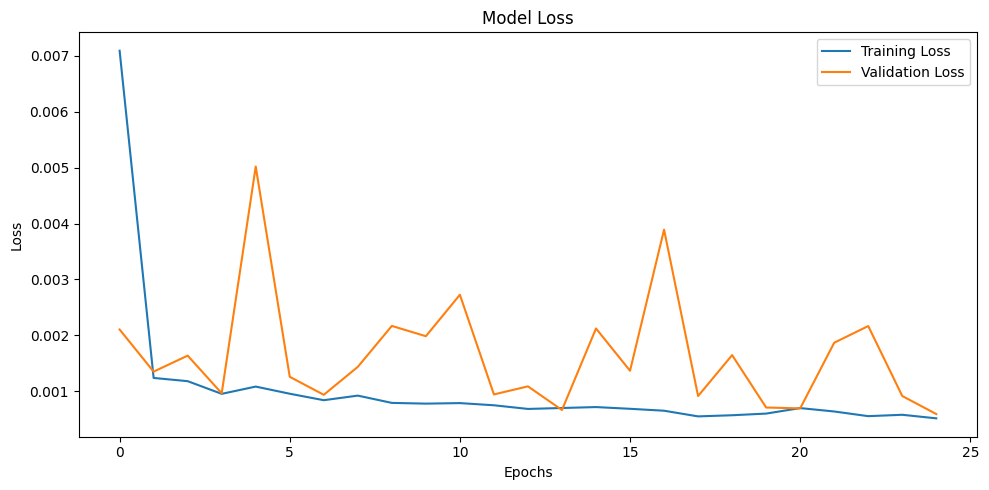

In [11]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig("DemoScreenshots/training_loss.png")
plt.show()


## Step 8: Predictions vs Actual
- Compare predicted prices with actual closing prices.
- Red line: Predicted | Blue line: Actual


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


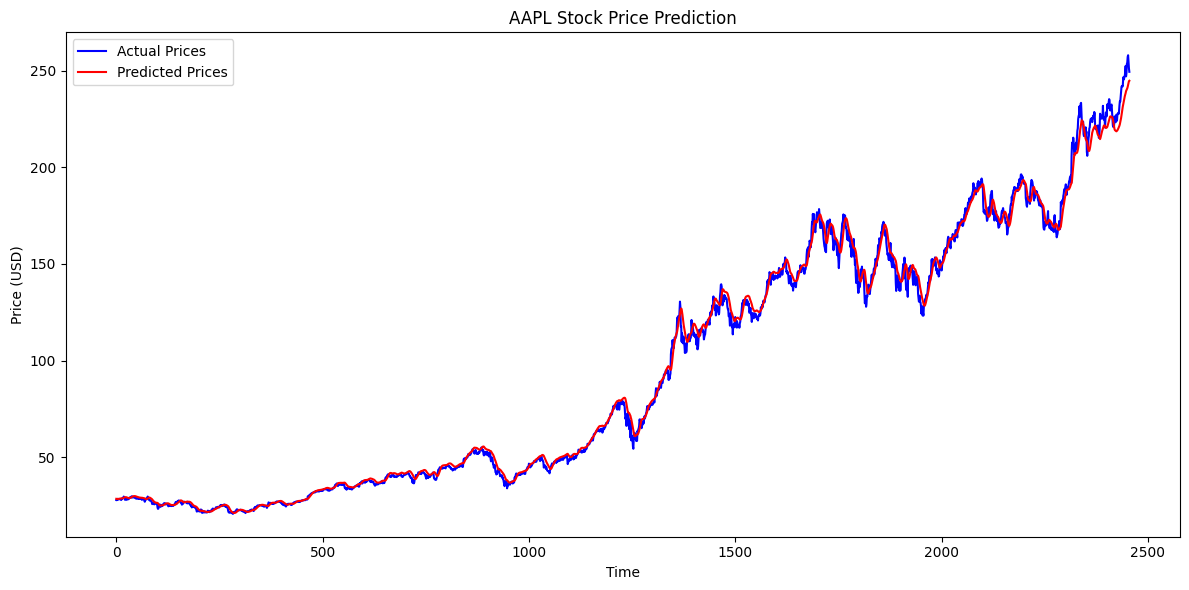

In [12]:
# Predict using the trained model
predicted_prices = model.predict(X)

# Inverse transform to original scale
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y.reshape(-1,1))

# Plot predictions vs actual
plt.figure(figsize=(12,6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.savefig("DemoScreenshots/predicted_vs_actual.png")
plt.show()


## Step 9: Moving Average & RSI Indicators
- MA20 and MA50 help identify trend direction.
- RSI identifies overbought (RSI>70) or oversold (RSI<30) conditions.
- Plots saved in `DemoScreenshots/` folder.


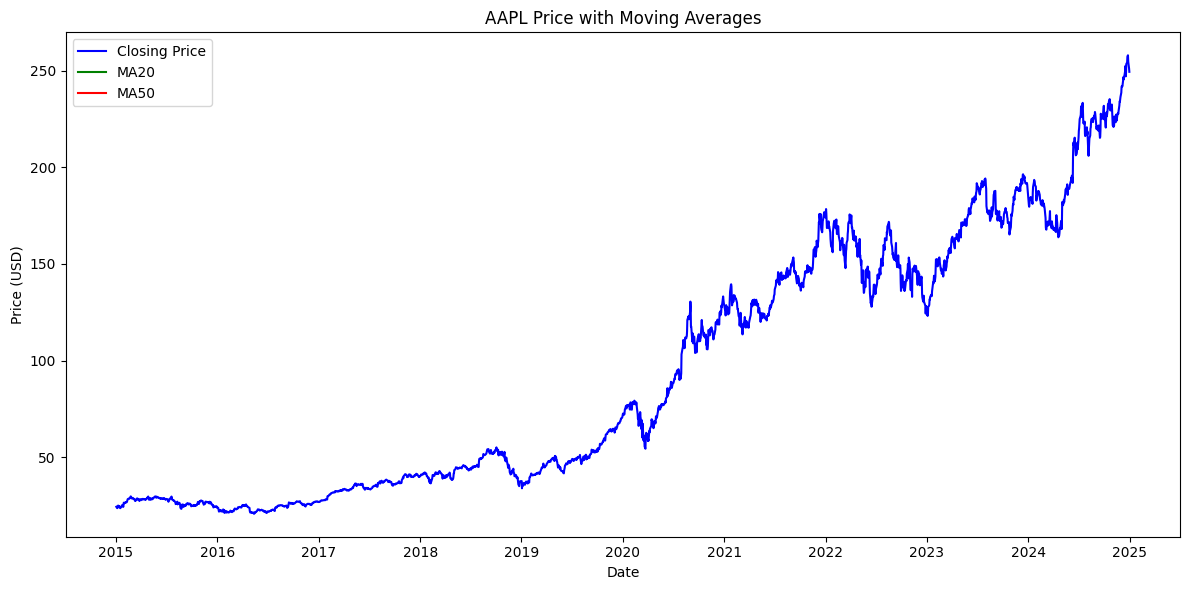

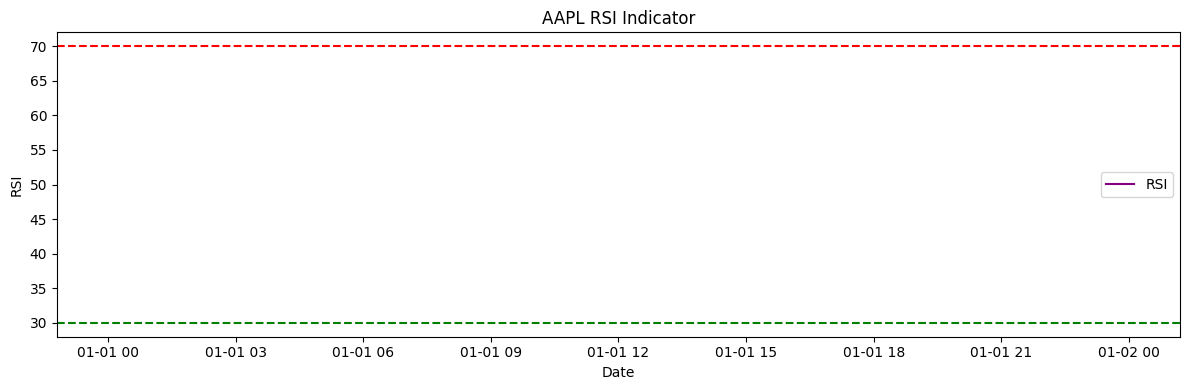

In [16]:
# Step 9: Moving Average & RSI using Pandas/Numpy

# Moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# RSI calculation
delta = df['Close'].diff().values.flatten()  # convert to 1D
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(14).mean()
avg_loss = pd.Series(loss).rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Plot Closing Price with Moving Averages
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['MA20'], label='MA20', color='green')
plt.plot(df['MA50'], label='MA50', color='red')
plt.title(f'{ticker} Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.savefig("DemoScreenshots/moving_average.png")
plt.show()

# Plot RSI
plt.figure(figsize=(12,4))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.title(f'{ticker} RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.legend()
plt.tight_layout()
plt.savefig("DemoScreenshots/rsi.png")
plt.show()


In [17]:
# Save trained LSTM model
model.save("lstm_model.h5")


# Insights & Conclusion

- The LSTM model successfully captured historical stock price trends and generated reasonably accurate predictions.
- Moving Averages (MA20 & MA50) help identify short-term and medium-term trends in the stock.
- RSI indicator highlights overbought (RSI > 70) and oversold (RSI < 30) conditions, useful for timing entry/exit points.
- Visual comparison of predicted vs actual prices shows that the model follows the trend but may miss sudden spikes or drops.
- This project demonstrates the power of deep learning in time series forecasting and the value of combining it with technical indicators for better analysis.
- The Streamlit dashboard allows interactive visualization for any stock ticker, making it more user-friendly.


# Future Enhancements

- Include additional features such as trading volume, news sentiment, or macroeconomic indicators to improve prediction accuracy.
- Experiment with more advanced deep learning architectures like GRU, Bidirectional LSTM, or Transformer-based models.
- Deploy the dashboard online for real-time stock predictions and updates.
- Add interactive visualizations such as candlestick charts, Bollinger Bands, or other technical indicators.
- Implement automated alerts when predicted prices cross certain thresholds or RSI indicates overbought/oversold conditions.
- Perform hyperparameter tuning and model optimization for better forecasting performance.
